In [5]:
from djchurchland import *
from djchurchland.schema import * # Imports all schemas from the database
from djchurchland.utils import *
from djchurchland.chipmunk.psychometric import PsychometricFit
from djchurchland.chipmunk.fit_psychometric import cumulative_gaussian, PsychometricRegression
from chiCa.chiCa import separate_axes

from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)
plt.rcParams['font.sans-serif'] = ['Arial'] 
plt.rcParams['font.size'] = 12

%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
subjects = ['GRB036', 'GRB037', 'GRB038', 'GRB045', 'GRB046']
subject_data = {}
for subject in subjects:
    query_dict = pd.DataFrame((PsychometricFit() & f'subject_name = "{subject}"').fetch('bias', 'sensitivity', 'guess_rate', 'lapse_rate', as_dict=True, limit=10, order_by='-session_datetime')) #& 'session_datetime LIKE "2025-08%"'
    query_dict['bias'] = query_dict['bias'] - 12
    subject_data[subject] = query_dict

In [3]:
data = {}
for subject, params in subject_data.items():
    data_dict = {}
    for param in ['bias', 'sensitivity', 'guess_rate', 'lapse_rate']:
        data_dict[param] = pd.concat([
            pd.DataFrame({param: subject_data[subject][param], 'animal': subject}),
            pd.DataFrame({param: subject_data[subject][param], 'animal': subject})
        ], ignore_index=True)
    data[subject] = data_dict

bias = pd.concat([data[subject]['bias'] for subject in subjects], ignore_index=True)
sensitivity = pd.concat([data[subject]['sensitivity'] for subject in subjects], ignore_index=True)
guess_rate = pd.concat([data[subject]['guess_rate'] for subject in subjects], ignore_index=True)
lapse_rate = pd.concat([data[subject]['lapse_rate'] for subject in subjects], ignore_index=True)

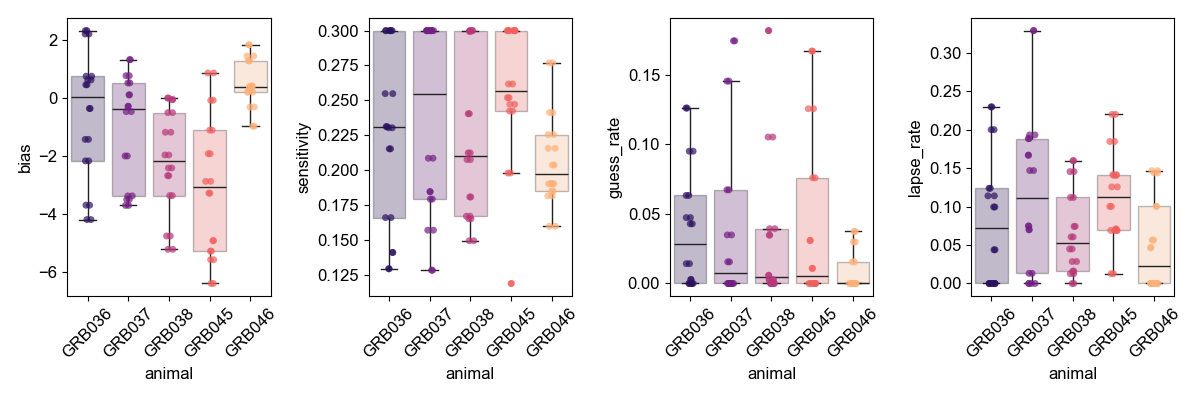

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

sns.boxplot(x='animal', y='bias', data=bias, hue='animal', palette='magma', ax=ax[0], showcaps=True, boxprops=dict(alpha=0.3), showfliers=False)
sns.stripplot(x='animal', y='bias', data=bias, hue='animal', dodge=False, ax=ax[0], alpha=0.7, jitter=True, palette='magma')
ax[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='animal', y='sensitivity', data=sensitivity, hue='animal', palette='magma', ax=ax[1], showcaps=True, boxprops=dict(alpha=0.3), showfliers=False)
sns.stripplot(x='animal', y='sensitivity', data=sensitivity, hue='animal', dodge=False, ax=ax[1], alpha=0.7, jitter=True, palette='magma')
ax[1].tick_params(axis='x', rotation=45)

sns.boxplot(x='animal', y='guess_rate', data=guess_rate, hue='animal', palette='magma', ax=ax[2], showcaps=True, boxprops=dict(alpha=0.3), showfliers=False)
sns.stripplot(x='animal', y='guess_rate', data=guess_rate, hue='animal', dodge=False, ax=ax[2], alpha=0.7, jitter=True, palette='magma')
ax[2].tick_params(axis='x', rotation=45)

sns.boxplot(x='animal', y='lapse_rate', data=lapse_rate, hue='animal', palette='magma', ax=ax[3], showcaps=True, boxprops=dict(alpha=0.3), showfliers=False)
sns.stripplot(x='animal', y='lapse_rate', data=lapse_rate, hue='animal', dodge=False, ax=ax[3], alpha=0.7, jitter=True, palette='magma')
ax[3].tick_params(axis='x', rotation=45)

fig.tight_layout()
